In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import variance, stdev  # for performing statitistics analysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-status-prediction/loan_data.csv


In [2]:

df = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


**Data Sanity Checks**

In [7]:
df.shape

(381, 13)

- The shape of data is 381 rows and 13 columns.

In [8]:
# checking missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

 the columns with missing values include:
*  Gender                5
*  Dependents            8
*  Self_Employed        21
*  Loan_Amount_Term     11
*  Credit_History       30

 

In [11]:
# checking duplicates
df.duplicated().sum()


0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


the data sets have the follwoing dtypes
* float 4 columns
* Int 1 column
* Objects 8 columns

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [15]:
# object columns
df.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,381,381,LP001003,1
Gender,376,2,Male,291
Married,381,2,Yes,228
Dependents,373,4,0,234
Education,381,2,Graduate,278
Self_Employed,360,2,No,325
Property_Area,381,3,Semiurban,149
Loan_Status,381,2,Y,271


**Univeriate Analysis**

In [16]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

Property Area is divided into 3:
* Semiurban   
* Urban        
* Rural 

In [17]:
df['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

Education is divided into 
* Graduate        
* Not Graduate    

In [19]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

Divided into 
* 0     234
* 2      59
* 1      52
* 3+     28

3+ 

In [21]:
df['Loan_Status'].value_counts()

#independent variable

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [ ]:
df.describe().T

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing distribution of loan amount term')

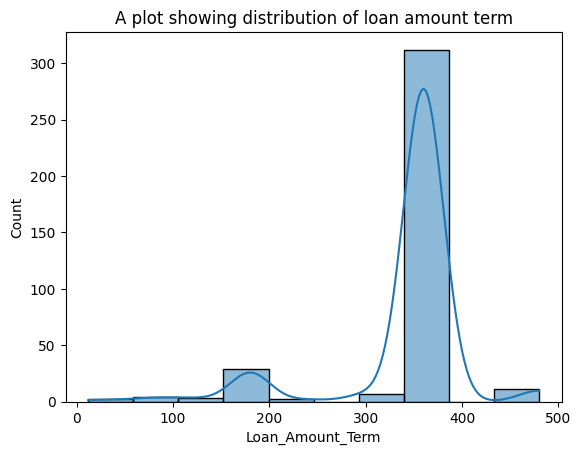

In [23]:
sns.histplot(df, x = 'Loan_Amount_Term', kde=True)
plt.title('A plot showing distribution of loan amount term')

In [26]:
medin = df['Loan_Amount_Term'].median()
medin

360.0

In [27]:
med = df['Loan_Amount_Term'].mean()
med

340.86486486486484

In [30]:
med2 = np.nanmedian(df['Loan_Amount_Term'])
med2

360.0

In [32]:
mod = df['Loan_Amount_Term'].mode()
mod

0    360.0
Name: Loan_Amount_Term, dtype: float64